# Actividad 3 - Regresion lineal dataset tips

Ioan Beilic

nota: estoy usando sklearn 1.4, que tiene la funcion root_mean_squared_error nueva

## Cargar datos

In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # para graficos y para cargar el dataset

cargo el dataset tips que viene con seaborn

In [450]:
tips = sns.load_dataset('tips')


vamos a ver las primeras filas a ver que contiene

In [451]:

tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [452]:
tips.shape  # cuantas filas y columnas hay?

(244, 7)

In [453]:

tips.info()  # tipos de cada columna

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [454]:

# estadisticas basicas
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Limpieza
vamos a ver si hay nulos o duplicados

In [455]:
tips.isnull().sum()  # hay nulos?

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [456]:
tips.duplicated().sum()  # hay alguno repetido?

np.int64(1)

In [457]:
# un duplicado - vamos a ver cual 
tips[tips.duplicated(keep=False)]

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [458]:
# eliminamos el duplicado
tips = tips.drop_duplicates()

In [459]:
"""
Filtrar outliers de tip , si eliminamos los outliers, em modelo
Metrica RMSE:
  - 0.7929
"""

# tips = tips[tips['tip'] <= 5]
# print(f'Antes: {len(tips)} filas')
# print(f'Después: {len(tips_sin_outliers)} filas')

'\nFiltrar outliers de tip , si eliminamos los outliers, em modelo\nMetrica RMSE:\n  - 0.7929\n'

In [460]:
# revisamos que se elimino el duplicado
tips.duplicated().sum()

np.int64(0)

In [461]:
# tipos de datos
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

## analisis exploratorio

vamos a ver graficos para entender mejor los datos

### graficos de cada variable por separado

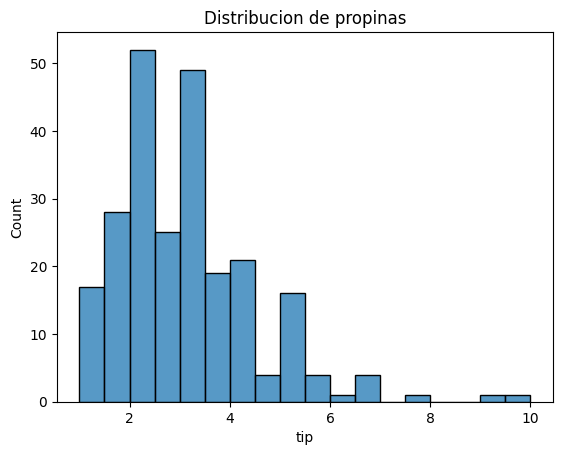

In [462]:
sns.histplot(tips['tip'])
plt.title('Distribucion de propinas')
plt.show()


la mayoria de propinas estan entre 2 y 4, hay algunas altas de 8-10 que podrian ser outliers

los valores extremos los dejo por ahora, no parecen errores de los datos

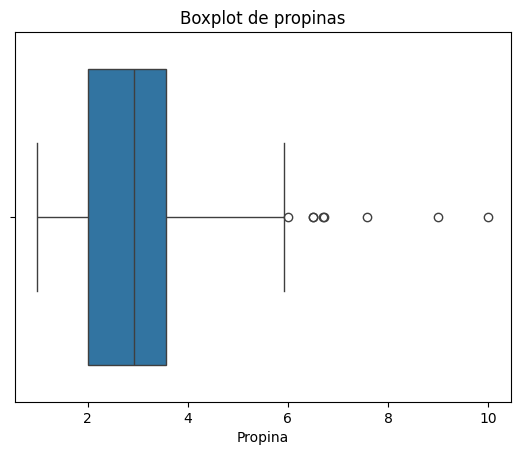

In [463]:
# visualizar la distribucion de datos y detectar outliers
sns.boxplot(x=tips['tip'])
plt.title('Boxplot de propinas')
plt.xlabel('Propina')
plt.show()

#### Conclusiones:
- La mayoría de propinas están entre 2 y ~3.5 (la caja)
- Hay varios outliers - aproximadamente 6 propinas que son mucho más altas de lo normal
- No hay outliers por abajo - no hay propinas inusualmente bajas
- Distribución asimétrica - la caja está más cerca del mínimo que del máximo

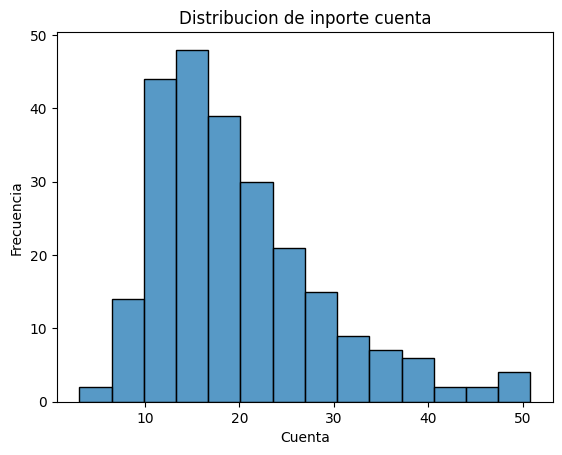

In [464]:
# Histograma de total bills
sns.histplot(tips['total_bill'])
plt.title('Distribucion de inporte cuenta')
plt.xlabel('Cuenta')
plt.ylabel('Frecuencia')
plt.show()

- Distribución sesgada a la derecha - Similar a las propinas, la mayoría de valores están a la izquierda
- Rango típico: 10-25 - La mayoría de cuentas están entre 10 y 25
- Pico en ~15-17 - El valor más frecuente (casi 50 clientes)
- Rango total: 5-50 - Desde cuentas muy baratas (~5) hasta caras (~50)
- Cola larga a la derecha - Pocas cuentas altas (35-50)

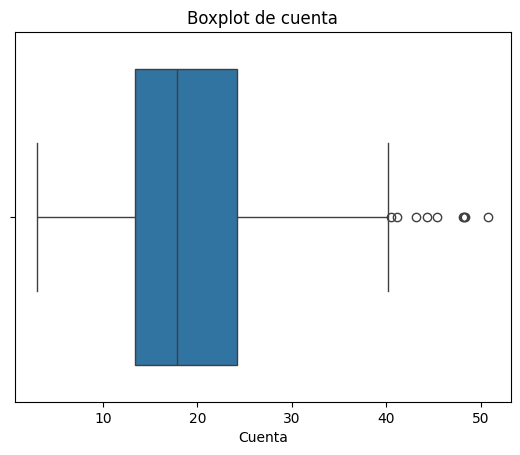

In [465]:
# Boxplot de total_bill
sns.boxplot(x=tips['total_bill'])
plt.title('Boxplot de cuenta')
plt.xlabel('Cuenta')
plt.show()

#### Conclusiones:
- La mayoría de cuentas están entre ~13 y ~25 (la caja)
- Hay ~7 outliers - cuentas muy altas (más de 40)
- No hay outliers por abajo - no hay cuentas inusualmente bajas
- Patrón similar a tip - ambas variables tienen outliers solo hacia arriba

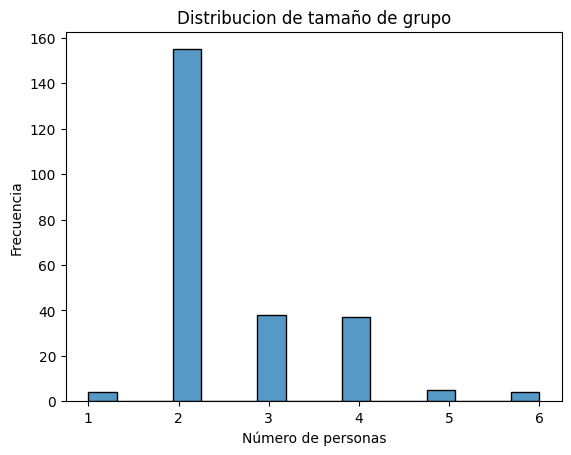

In [466]:
# Histograma de size
sns.histplot(tips['size'])
plt.title('Distribucion de tamaño de grupo')
plt.xlabel('Número de personas')
plt.ylabel('Frecuencia')
plt.show()

- Dominio absoluto de parejas (2 personas) - Más de 150 mesas son de 2 personas
- Distribución muy desbalanceada:
  - 1 persona	~5 (muy pocos)
  - 2 personas	~155 (la mayoría)
  - 3 personas	~38
  - 4 personas	~37
  - 5 personas	~5
  - 6 personas	~4
- Es una variable discreta - Solo valores enteros (1, 2, 3, 4, 5, 6), por eso las barras están separadas

#### Conclusiones:
- El restaurante es principalmente para parejas (~65% de las mesas)
- Grupos de 3-4 son comunes
- Grupos grandes (5-6) son raros
- Personas solas casi no vienen

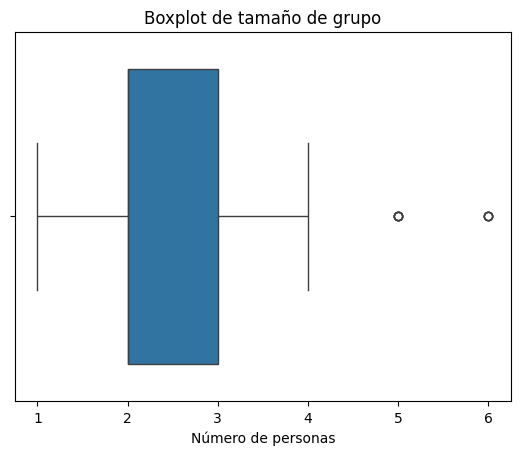

In [467]:
# Boxplot de size
sns.boxplot(x=tips['size'])
plt.title('Boxplot de tamaño de grupo')
plt.xlabel('Número de personas')
plt.show()

#### Conclusiones:
- Mediana = 2 - Confirma que la mayoría son parejas
- Caja muy comprimida - Poca variación (casi todos entre 2-3)
- 5 y 6 son outliers - Los grupos grandes son considerados "anormales" estadísticamente

### Resumen EDA Univariante variables numéricas:
- tip:
	- Distribucion: Sesgada derecha típico 2-4
  - Outliers: Sí (propinas altas)
- total_bill:
	- Distribucion: Sesgada derecha, típico 13-25
  - Outliers:	Sí (cuentas altas)
- size:	
    - Distribucion: Dominan parejas (2)	
    - Outliers: Sí (grupos 5-6)


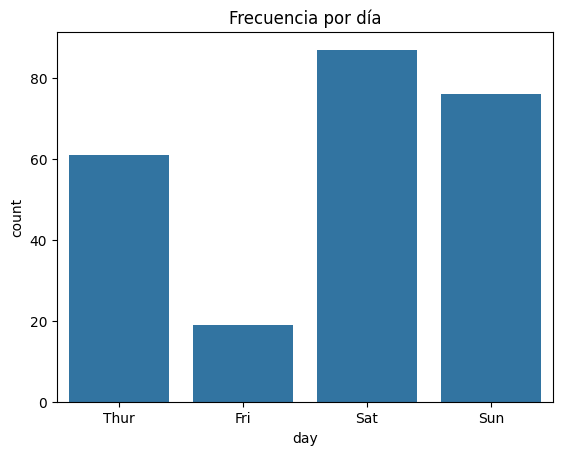

In [468]:
# Countplot de día
sns.countplot(x='day', data=tips)
plt.title('Frecuencia por día')
plt.show()

- Thur (Jueves)	~61
- Fri (Viernes)	~19
- Sat (Sábado)	~87
- Sun (Domingo)	~76



- Sábado es el día más concurrido (~87 clientes)
- Viernes es el día más flojo (~19 clientes) - Sorprendente
- Fin de semana domina - Sábado y Domingo juntos son ~163 clientes (más del 65%)
- Solo hay 4 días - El restaurante parece operar Jueves a Domingo (o solo tenemos datos de esos días)




**El día de la semana podría influir en la propina. Los fines de semana la gente parece dejar más propina.**

### ahora relaciones entre variables

- total_bill vs tip	¿A mayor cuenta, mayor propina?	Scatter plot
- size vs tip	¿Grupos grandes dejan más propina?	Scatter plot o boxplot
- day vs tip	¿Qué día dejan más propina?	Boxplot
- time vs tip	¿Almuerzo o cena da más propina?	Boxplot

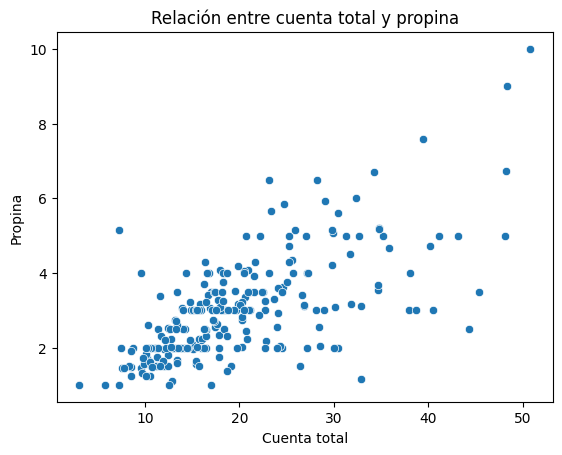

In [469]:
# Scatter plot: cuenta vs propina
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Relación entre cuenta total y propina')
plt.xlabel('Cuenta total')
plt.ylabel('Propina')
plt.show()

- Cuenta baja (10)  → Propina baja (~2)
- Cuenta alta (50)  → Propina alta (~10)

- Relación lineal - A mayor cuenta, mayor propina (tendencia general)
- Dispersión - No es una línea perfecta. Hay variación:
- Algunas cuentas de 30 tienen propina de 2
- Algunas cuentas de 10 tienen propina de 4
- Los outliers de antes - Se ven los puntos altos a la derecha (cuentas de 50 con propinas de 9-10)

**total_bill es probablemente la variable más importante para predecir tip. La regresión lineal funcionará bien aquí porque la relación es bastante lineal.**

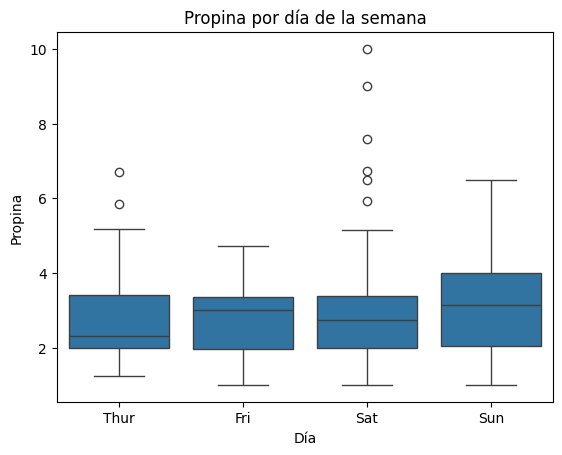

In [470]:
# Boxplot: propina por día
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Propina por día de la semana')
plt.xlabel('Día')
plt.ylabel('Propina')
plt.show()

- Las medianas son muy similares (~2.5-3.5) - El día no afecta mucho a la propina típica
- Domingo tiene la caja más alta - Ligeramente más propina los domingos
- Sábado tiene más outliers - Hay clientes que dejan propinas muy altas (hasta 10)
- Viernes es el día más "estable" - Sin outliers, todo concentrado

**El día de la semana no parece ser muy determinante para la propina. Las medianas son casi iguales. Puede que no aporte mucho al modelo.**

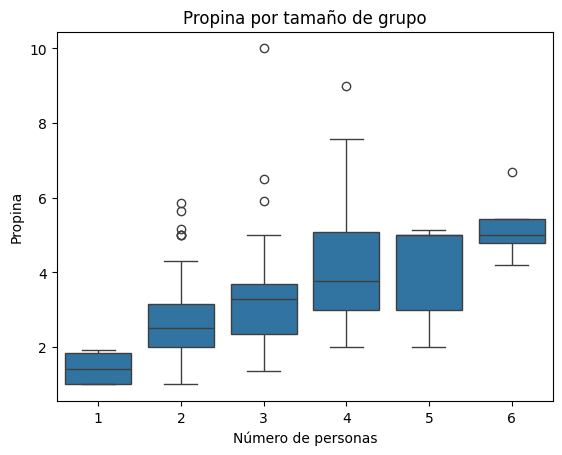

In [471]:
# Boxplot: propina por tamaño de grupo
sns.boxplot(x='size', y='tip', data=tips)
plt.title('Propina por tamaño de grupo')
plt.xlabel('Número de personas')
plt.ylabel('Propina')
plt.show()

- 1	~1.5	Propina más baja
- 2	~2.5	La más común
- 3	~3.2	Sube
- 4	~3.5	Sigue subiendo
- 5	~5	Alta
- 6	~5	Alta

- orrelación positiva clara - A más personas, más propina
- endencia creciente - Las cajas suben de izquierda a derecha
- ógico - Grupos grandes piden más comida → cuenta más alta → propina más alta
- rupos de 5-6 tienen outliers - Pero son pocos datos (recuerda el histograma)

### Resumen EDA Bivariante hasta ahora:

- total_bill:
	- Relación:Sí, positiva fuerte
  - Útil para el modelo: Muy útil
- day:
	- Relación: Casi nula
  - Útil para el modelo: Poco útil
- size:
  - Relación: Sí, positiva
  - Útil para el modelo: útil

### multivariante - combinando mas variables

- Scatter con color	2 variables numéricas + 1 categórica
- Heatmap de correlación	Correlación entre todas las variables numéricas
- Pairplot	Todas las combinaciones de variables

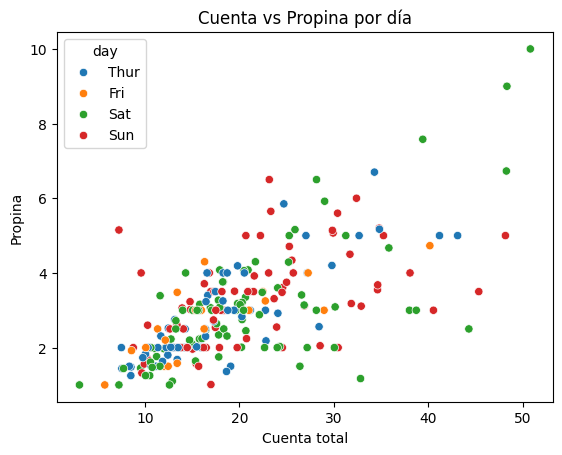

In [472]:
# total_bill vs tip coloreado por day:
sns.scatterplot(x='total_bill', y='tip', hue='day', data=tips)
plt.title('Cuenta vs Propina por día')
plt.xlabel('Cuenta total')
plt.ylabel('Propina')
plt.show()


- La relación cuenta-propina se mantiene - Independiente del día, a mayor cuenta, mayor propina
- Los colores están mezclados - No hay un patrón claro por día:
  - No vemos todos los azules (Thur) arriba y los rojos (Sun) abajo
  - Los puntos de todos los días están dispersos por igual
- Los outliers (arriba derecha) - Son principalmente verdes (Sat) - Las propinas más altas son los sábados

**El día no cambia la relación entre cuenta y propina. El patrón es el mismo para todos los días.**

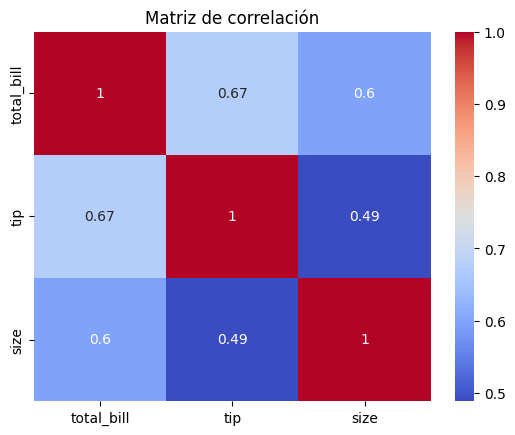

In [473]:
# Seleccionar solo columnas numéricas
numericas = tips[['total_bill', 'tip', 'size']]

# Crear heatmap de correlación
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

- total_bill vs tip:
  - Correlacion:	0.67
  - Conclusion: Correlacion positiva fuerte
- total_bill vs size:
  - Correlacion:	0.60
  - Conclusion: Correlacion positiva moderada
- tip vs size:
  - Correlacion:	0.49	C
  - Conslusion: Correlacion positiva moderada
- Diagonal (1, 1, 1)	1.00	Una variable consigo misma (siempre 1), no apuerta informacion util, ignorar


1. total_bill es la mejor variable para predecir tip (0.67)
2. size también ayuda pero menos (0.49)
3. Cuidado: total_bill y size están correlacionadas (0.60) - Esto tiene sentido: más personas = cuenta más alta

## preparar datos para el modelo

ahora toca preparar los datos para poder meterlos en el modelo de regresion

primero las categoricas las paso a numericas con one-hot

get_dummies crea una columna por cada valor de la variable categorica

In [474]:
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], dtype=int)
tips_encoded.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


separar X (predictoras) e y (variable objetivo)

X tiene todas las columnas menos tip (lo que usamos para predecir) y lo que queremos predecir es tip

In [475]:
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (243, 12)
y shape: (243,)


ahora hay que dividir en train y test

80% para entrenar y 20% para testear, el random_state es para que siempre de los mismos resultados

In [476]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train: {X_train.shape[0]} muestras')
print(f'Test: {X_test.shape[0]} muestras')

Train: 194 muestras
Test: 49 muestras


## modelo de regresion lineal

vamos a usar linearregression de sklearn a ver que tal

creamos y entrenamos el modelo

In [477]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print('listo, modelo entrenado')

listo, modelo entrenado


predicciones

In [478]:
y_pred = modelo.predict(X_test)

# comparamos predicciones vs realidad
comparacion = pd.DataFrame({'Real': y_test.values, 'Predicción': y_pred})
comparacion.head(10)

,Real,Predicción
0,3.18,2.889801
1,2.00,2.009718
2,2.74,2.946454
3,1.47,2.116184
4,5.92,3.888084
5,3.11,4.020281
6,3.00,4.182709
7,2.50,2.462775
8,3.23,2.523468
9,2.55,3.307343


metricas para ver que tan bien funciona

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# uso la version nueva de sklearn que tiene root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)  # version vieja
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

MSE: 1.1730
RMSE: 1.0831
R²: 0.5186



el RMSE es como 1.08, osea que se equivoca en promedio como 1 en la propina, que es bastante para un propia de 2 a  4. Y el R2 es 0.52, no esta mal pero tampoco es perfecto, explica como la mitad de la variacion

en resumen el modelo funciona pero podria ser mejor, pero para ser una regresion lineal basica no esta tan mal

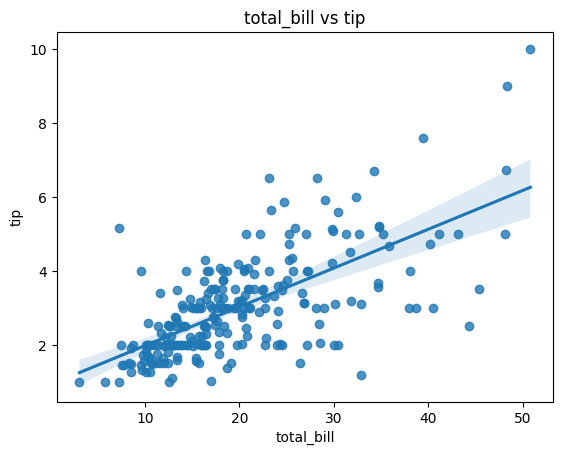

In [480]:
# grafico final con la linea de regresion
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('total_bill vs tip')
plt.show()